In [47]:
import fnmatch
import os
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [48]:
import matplotlib    
print(matplotlib.matplotlib_fname())

/home/carolina/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [49]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif',
 'cmb10',
 'STIXSizeFourSym',
 'cmtt10',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmex10',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmss10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmsy10',
 'cmr10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'Gillius ADF',
 'Noto Mono',
 'Sawasdee',
 'Liberation Serif',
 'DejaVu Sans',
 'Go Mono',
 'Liberation Sans',
 'Noto Sans Khmer',
 'Open Sans',
 'Liberation Mono',
 'Keraleeyam',
 'EB Garamond',
 'Garuda',
 'Cousine',
 'Roboto',
 'Noto Sans Myanmar UI',
 'Noto Serif Khmer',
 'Noto Serif Kannada',
 'AR PL Mingti2L Big5'

plot settings:

# Plotting Data 

In this notebook I will plot the data of the vertex fraction vs. magnetic field of the hysteresis loops at different mT/s rates. 

In [50]:
Data_path = "/home/carolina/Dropbox/BidisperseColloidalIce_PROJECT"

In [51]:
inc = []
dec = []
for file in os.listdir(Data_path):
    if fnmatch.fnmatch(file, 'Bajada200.dat'):
        print(file)
        dec.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
    if fnmatch.fnmatch(file, 'Bajada20000.dat'):
        print(file)
        dec.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
    if fnmatch.fnmatch(file, 'Subida200.dat'):
        print(file)
        inc.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
    if fnmatch.fnmatch(file, 'Subida20000.dat'):
        print(file)
        inc.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 

field_max = 200
keys_d = [20000,200]
keys_s = [200,20000]

Subida200.dat
Bajada20000.dat
Subida20000.dat
Bajada200.dat


In [52]:
dec

[                  mean       err
 field type                      
 0.0   Type 1  0.002778  0.000651
       Type 2  0.213889  0.003776
       Type 3  0.441111  0.005122
       Type 4  0.133056  0.005664
       Type 5  0.196944  0.002788
 ...                ...       ...
 200.0 Type 2  0.236111  0.003933
       Type 3  0.225278  0.006474
       Type 4  0.269444  0.005493
       Type 5  0.233611  0.003799
       Type 6  0.017778  0.001974
 
 [300 rows x 2 columns],
                  mean       err
 field type                     
 0.0   Type 1  0.01425  0.002077
       Type 2  0.24950  0.005025
       Type 3  0.25000  0.010567
       Type 4  0.23450  0.008017
       Type 5  0.22675  0.004167
 ...               ...       ...
 200.0 Type 2  0.19975  0.007307
       Type 3  0.43150  0.010316
       Type 4  0.17700  0.006696
       Type 5  0.17650  0.005907
       Type 6  0.01375  0.001250
 
 [600 rows x 2 columns]]

In [53]:
keys_d[:] = [round(field_max/x,2) for x in keys_d]
keys_s[:] = [round(field_max/x,2) for x in keys_s]

In [54]:
keys_s

[1.0, 0.01]

In [55]:
keys_d

[0.01, 1.0]

In [56]:
inc = pd.concat(inc, keys = keys_s)
dec = pd.concat(dec, keys = keys_d)

In [57]:
dec.index.names = ['change_m_time', 'field', 'type']
inc.index.names = ['change_m_time', 'field', 'type']

In [58]:
dec

mean       err
change_m_time field type                      
0.01          0.0   Type 1  0.002778  0.000651
                    Type 2  0.213889  0.003776
                    Type 3  0.441111  0.005122
                    Type 4  0.133056  0.005664
                    Type 5  0.196944  0.002788
...                              ...       ...
1.00          200.0 Type 2  0.199750  0.007307
                    Type 3  0.431500  0.010316
                    Type 4  0.177000  0.006696
                    Type 5  0.176500  0.005907
                    Type 6  0.013750  0.001250

[900 rows x 2 columns]

Now, I will filter only the data of the type 3 vertices.

In [59]:
dec = dec[np.in1d(dec.index.get_level_values(2), ['Type 3'])]
inc = inc[np.in1d(inc.index.get_level_values(2), ['Type 3'])]

In [60]:
dec

mean       err
change_m_time field      type                      
0.01          0.000000   Type 3  0.441111  0.005122
              4.081633   Type 3  0.440556  0.004487
              8.163265   Type 3  0.429773  0.008293
              12.244898  Type 3  0.414308  0.011674
              16.326531  Type 3  0.407761  0.008704
...                                   ...       ...
1.00          191.919192 Type 3  0.428874  0.007736
              193.939394 Type 3  0.429530  0.008109
              195.959596 Type 3  0.430187  0.008689
              197.979798 Type 3  0.430843  0.009437
              200.000000 Type 3  0.431500  0.010316

[150 rows x 2 columns]

In [61]:
dec = dec.sort_index(0)
inc = inc.sort_index(0)

In [62]:
#dec.to_csv('vertex_pop_type3_from200mT_to_0mT.dat', sep = '\t')
#inc.to_csv('vertex_pop_type3_from0mT_to_200mT.dat', sep = '\t')

In [63]:
dec

mean       err
change_m_time field      type                      
0.01          0.000000   Type 3  0.441111  0.005122
              4.081633   Type 3  0.440556  0.004487
              8.163265   Type 3  0.429773  0.008293
              12.244898  Type 3  0.414308  0.011674
              16.326531  Type 3  0.407761  0.008704
...                                   ...       ...
1.00          191.919192 Type 3  0.428874  0.007736
              193.939394 Type 3  0.429530  0.008109
              195.959596 Type 3  0.430187  0.008689
              197.979798 Type 3  0.430843  0.009437
              200.000000 Type 3  0.431500  0.010316

[150 rows x 2 columns]

In [64]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [65]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "red", "green", "purple", "purple", "cyan"]) 

1.0
1.0


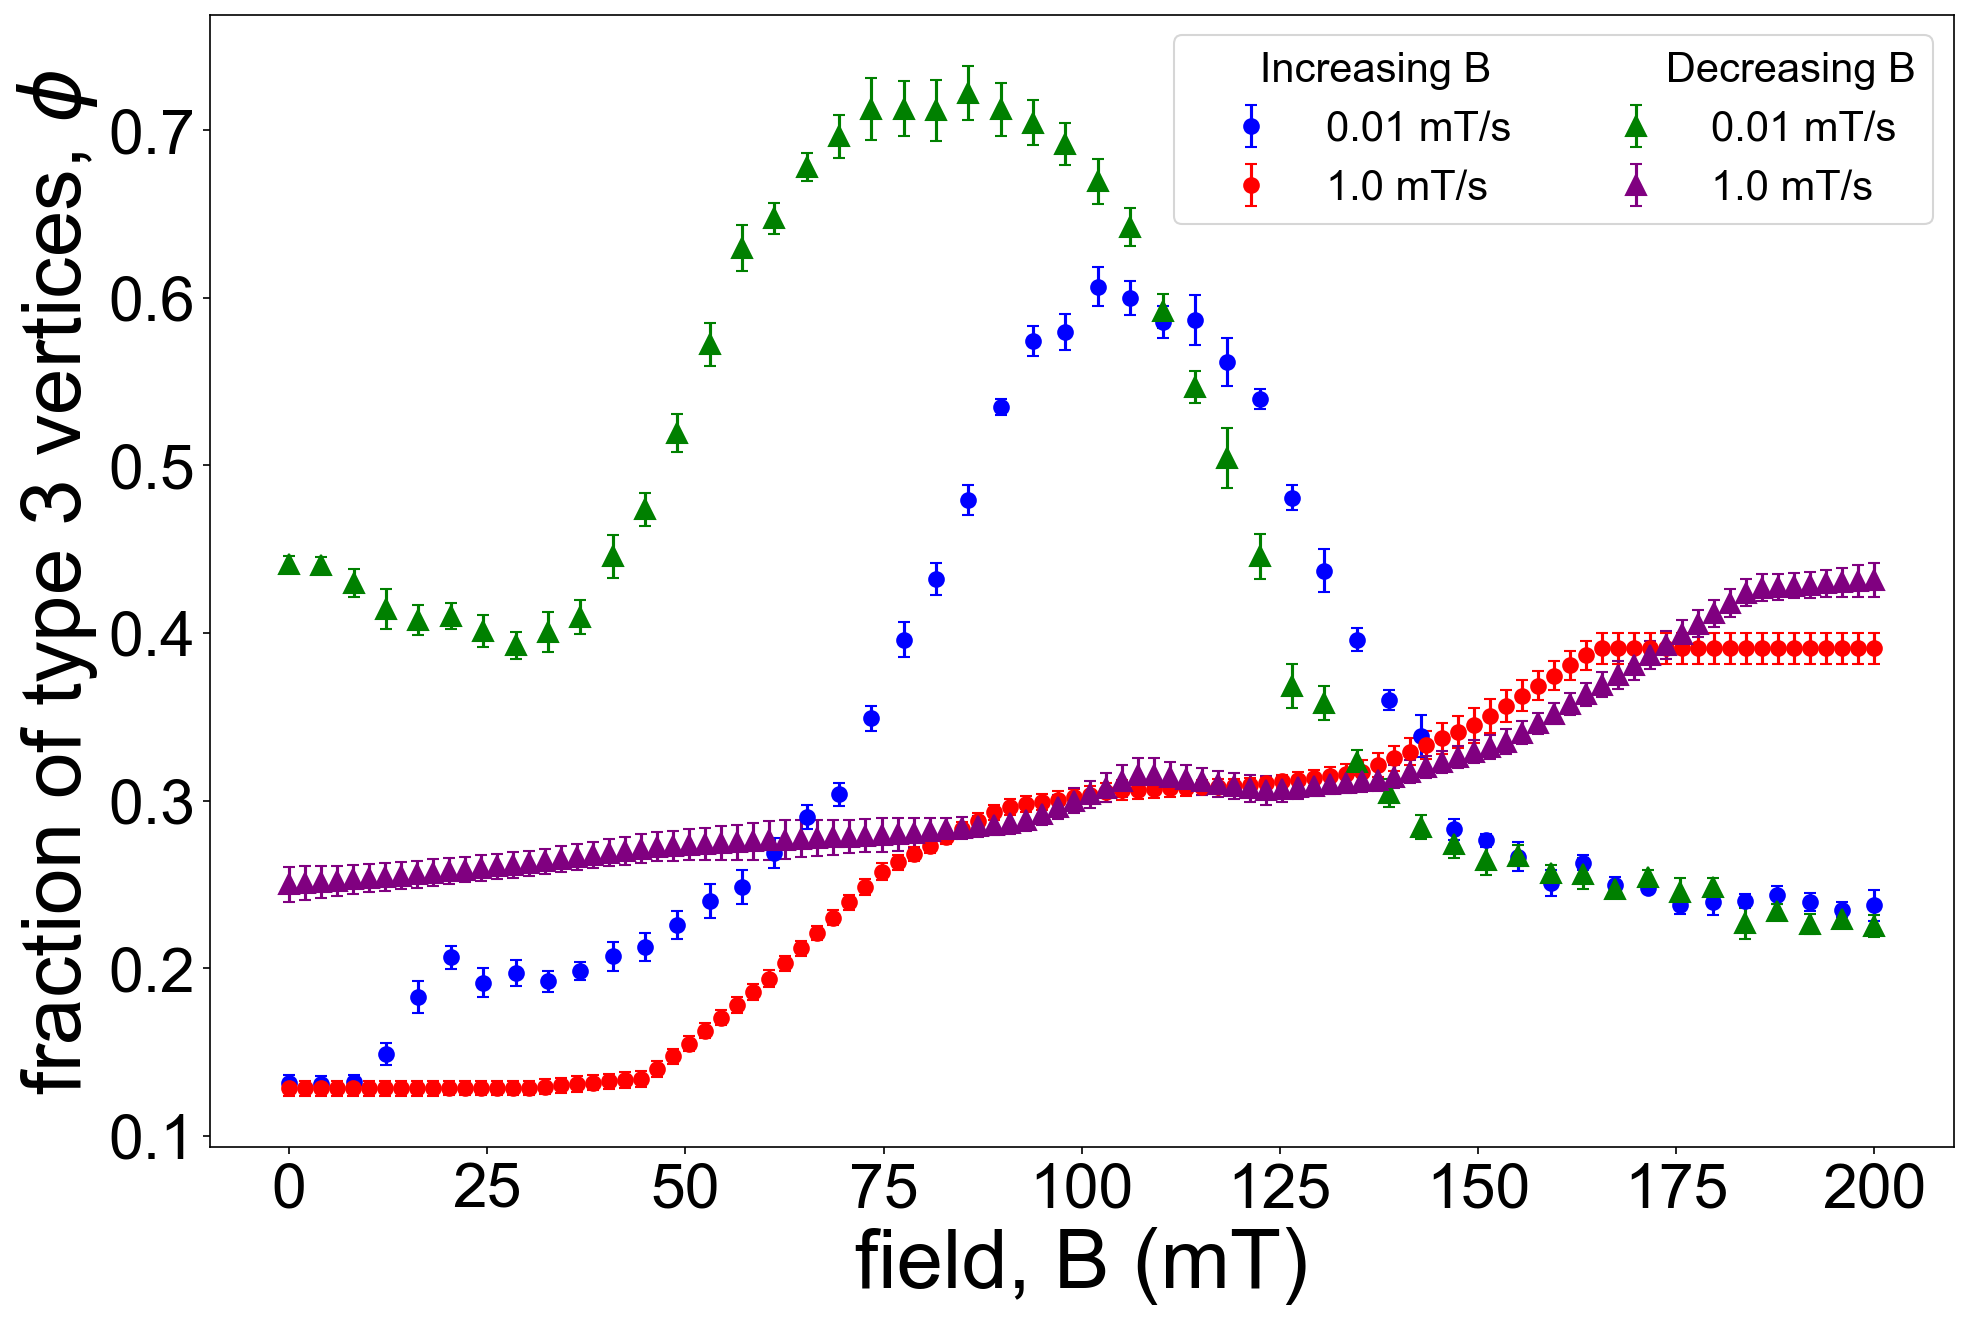

In [66]:
fig, ax = plt.subplots(1, figsize = (15,10), sharey=True)
#cmap = sns.color_palette("viridis", n_colors=len(keys_d))


dec_data = dec.groupby('change_m_time')
inc_data = inc.groupby('change_m_time')

for i, (n, gr) in enumerate(inc_data):
#    plt.errorbar(gr.index.get_level_values("field"), gr["mean"],yerr = gr['err'], color=cmap[i],label = n, fmt = 'o', markersize = 10)
    plt.errorbar(gr.index.get_level_values("field"), gr["mean"],yerr = gr['err'],capsize = 3, label = str(n) +' mT/s', fmt = 'o', markersize = 7)

for i_dec, (n_dec, gr_dec) in enumerate(dec_data):
#    plt.errorbar(gr_dec.index.get_level_values("field"), gr_dec["mean"],yerr = gr_dec['err'], color=cmap[i_dec],fmt ='^', markersize =10)
    plt.errorbar(gr_dec.index.get_level_values("field"), gr_dec["mean"],yerr = gr_dec['err'],capsize = 3,fmt ='^', markersize =10, label = str(n_dec)+' mT/s')
    print(n)
    
plt.tick_params(axis='y', labelsize=30)
plt.tick_params(axis='x', labelsize=30) 
plt.xlabel('field, B (mT)', size = 40)
plt.ylabel('fraction of type 3 vertices, $\phi$', size = 40)

plt.legend(loc = 'upper right',title = '      Increasing B               Decreasing B',fontsize = 20, title_fontsize = 20,ncol = 2,markerscale = 1)
#plt.figtext(0.05,0.9,'(a)', size = 30)
plt.savefig('Fig4a.pdf', bbox_inches='tight')

In [67]:
data = pd.concat((inc,dec), keys = ['increasing_B', 'decreasing_B'])

In [68]:
data

mean       err
             change_m_time field      type                      
increasing_B 0.01          0.000000   Type 3  0.131667  0.004583
                           4.081633   Type 3  0.131170  0.004824
                           8.163265   Type 3  0.131988  0.004510
                           12.244898  Type 3  0.148974  0.006420
                           16.326531  Type 3  0.182725  0.009407
...                                                ...       ...
decreasing_B 1.00          191.919192 Type 3  0.428874  0.007736
                           193.939394 Type 3  0.429530  0.008109
                           195.959596 Type 3  0.430187  0.008689
                           197.979798 Type 3  0.430843  0.009437
                           200.000000 Type 3  0.431500  0.010316

[300 rows x 2 columns]

In [69]:
data.to_csv('data_Fig4a.dat', sep = '\t')